<a href="https://www.kaggle.com/code/neeradh/qa-test?scriptVersionId=212601786" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [140]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import warnings 
warnings.filterwarnings("ignore")

In [155]:
df = pd.read_csv("/kaggle/input/asdfsv/dataset-talluri.csv")

In [128]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [130]:
#Checking for missing values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [131]:
df.shape

(12330, 18)

In [132]:
#Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

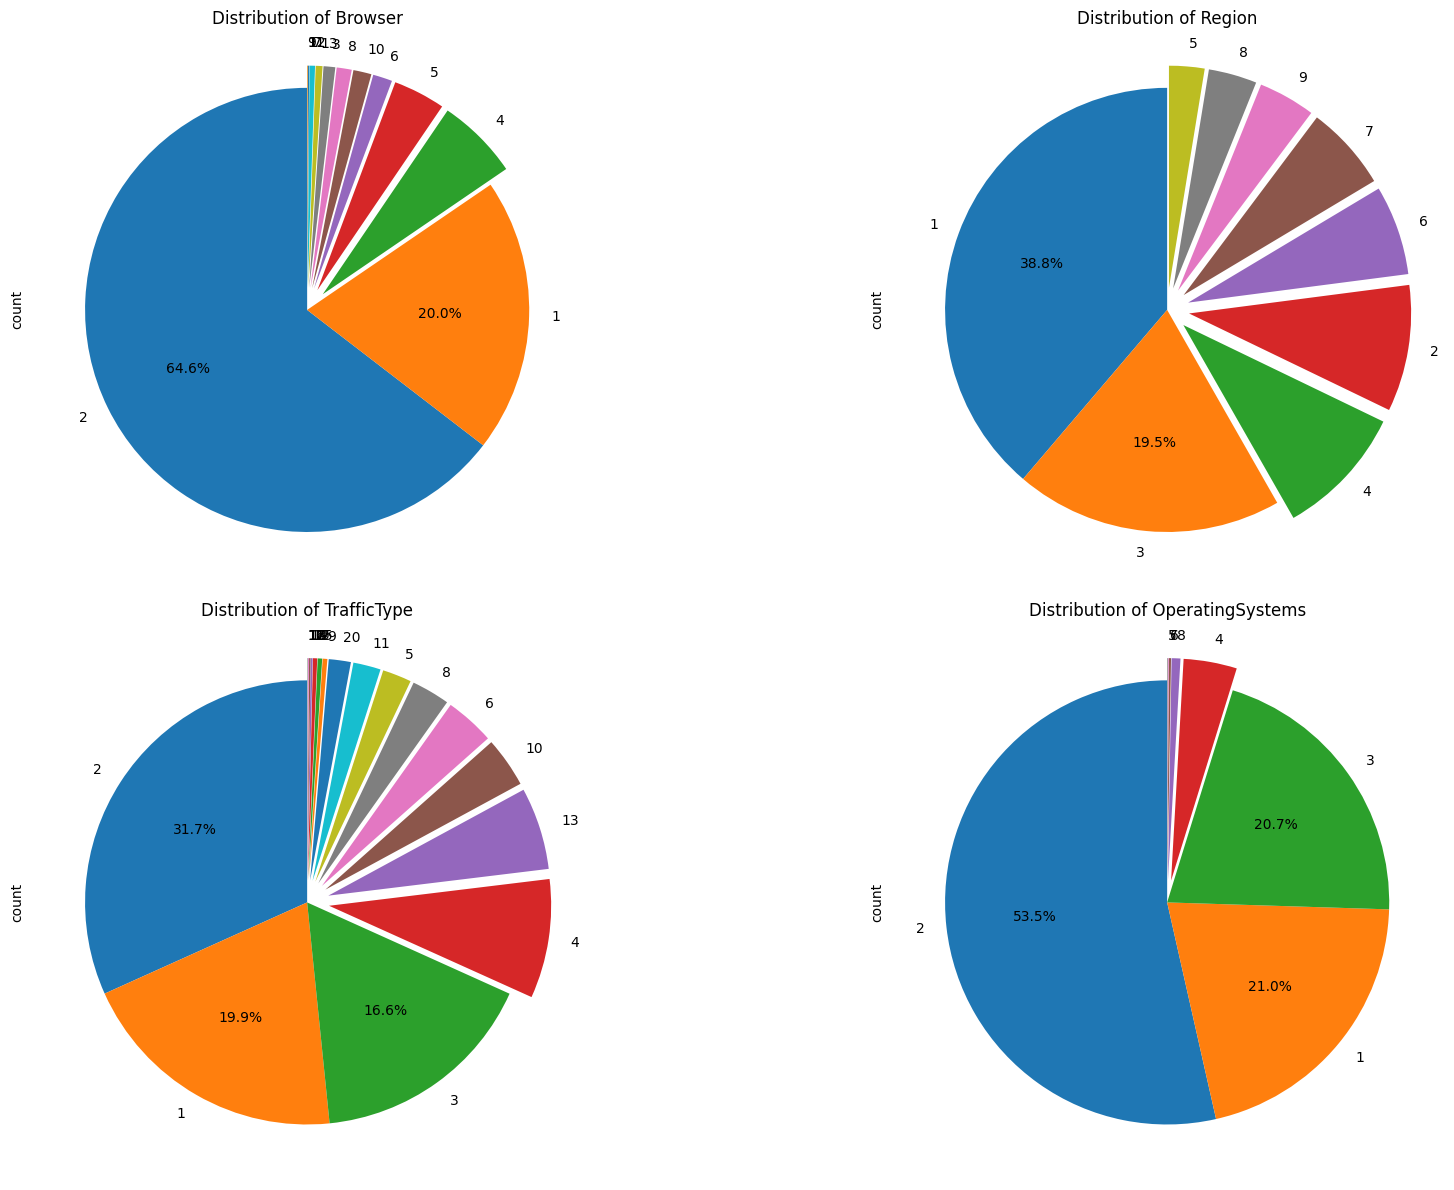

In [133]:
# Pie Plots for variables. Assuming that these variables are categorical and encoded with numerical values
categorical_vars = ['Browser', 'Region', 'TrafficType', 'OperatingSystems']
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 10 else ''
for i, var in enumerate(categorical_vars):
    value_counts = df[var].value_counts()
    explode = [0.1 if (val / value_counts.sum() < 0.1) else 0 for val in value_counts]
    value_counts.plot.pie(
    autopct=autopct_format,
    startangle=90,
    explode=explode,
    ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

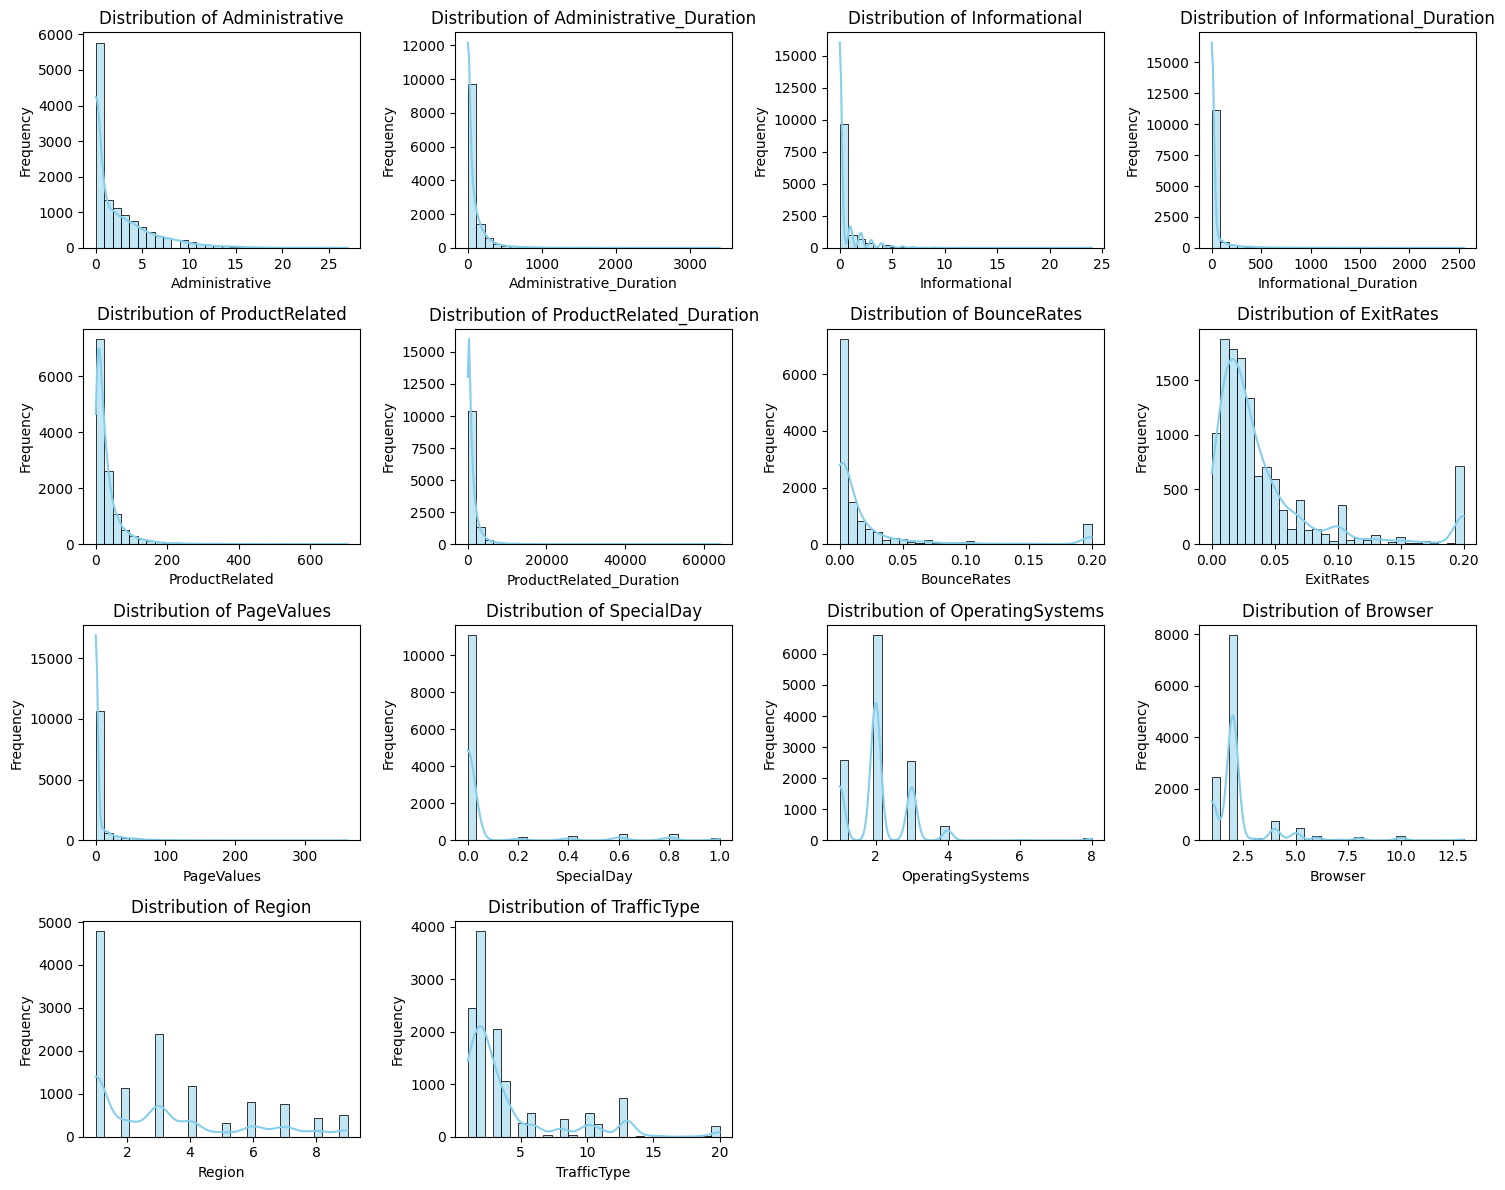

<Figure size 640x480 with 0 Axes>

In [145]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)  # Adjust the number of rows and columns based on your dataset
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

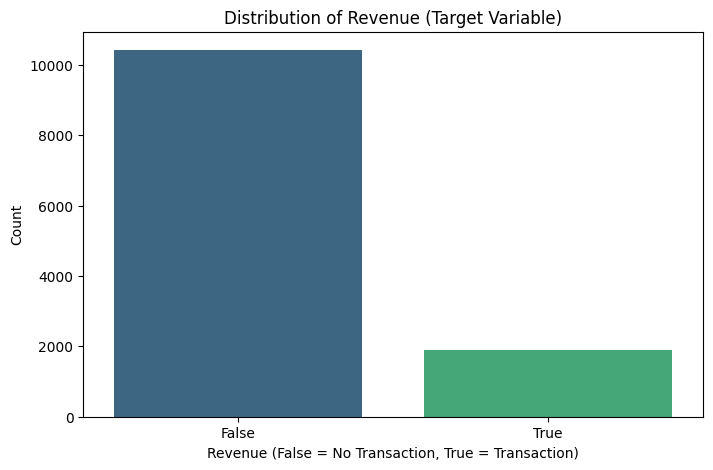

In [66]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Revenue', data=df, palette='viridis')
plt.title('Distribution of Revenue (Target Variable)')
plt.xlabel('Revenue (False = No Transaction, True = Transaction)')
plt.ylabel('Count')
plt.show()

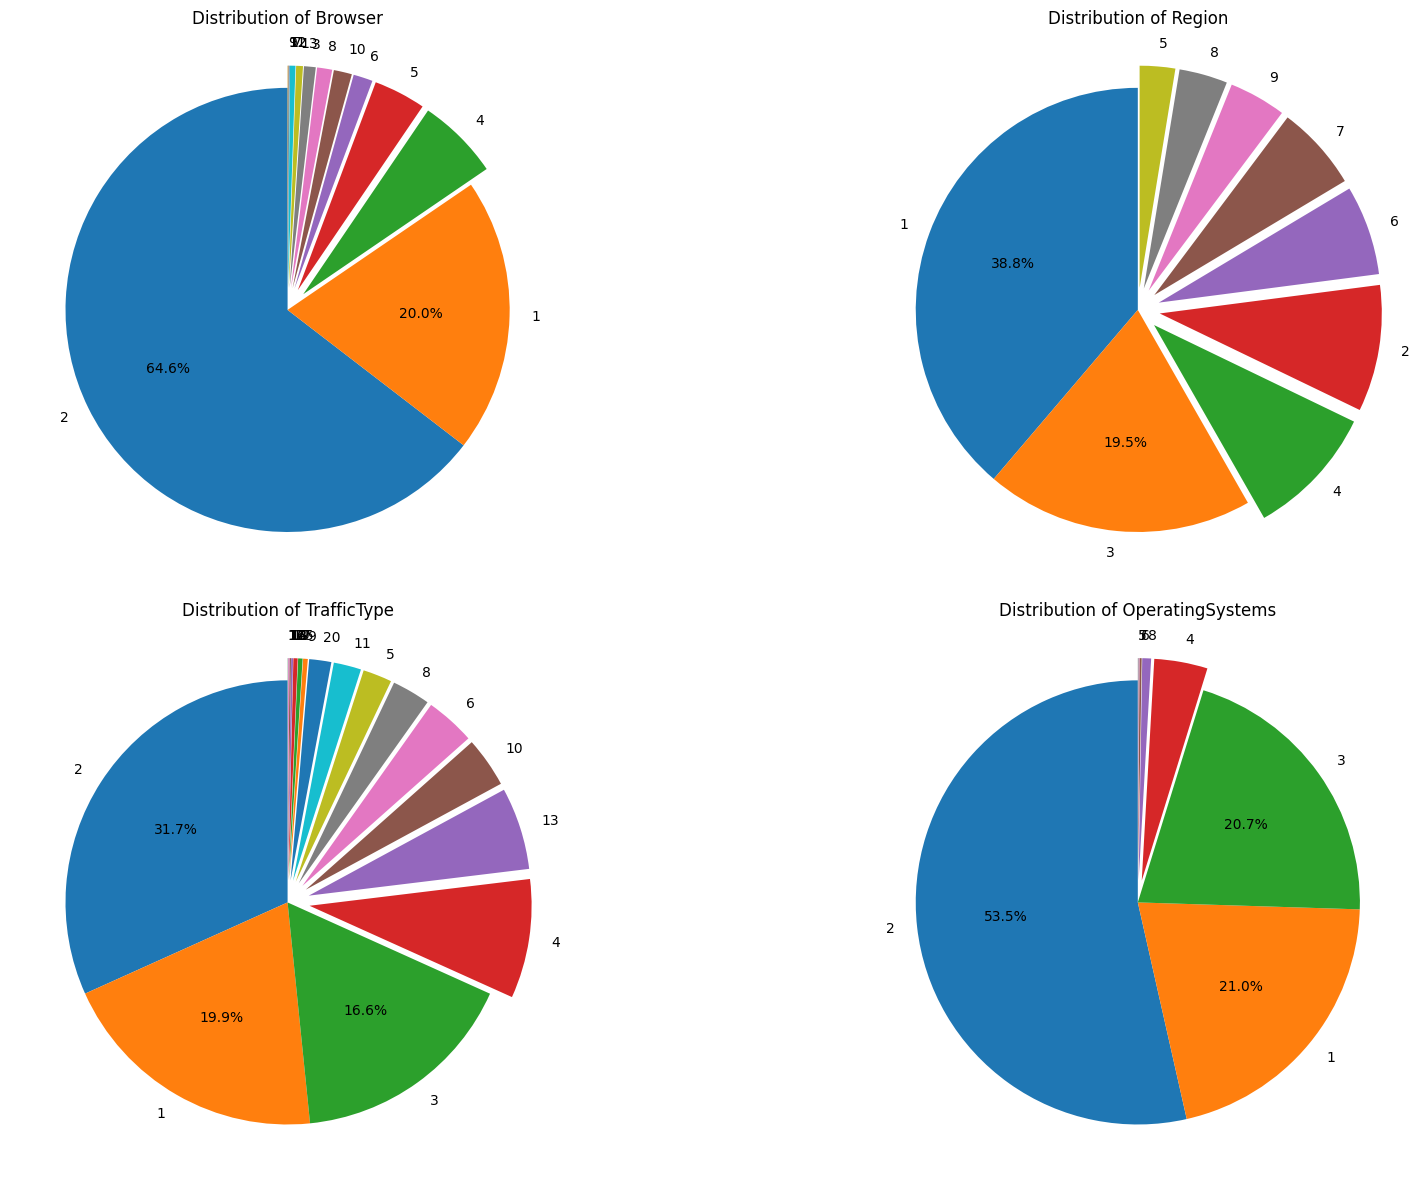

In [67]:
categorical_vars = ['Browser', 'Region', 'TrafficType', 'OperatingSystems']
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 10 else ''
for i, var in enumerate(categorical_vars):
    value_counts = df[var].value_counts()
        explode = [0.1 if (val / value_counts.sum() < 0.1) else 0 for val in value_counts]
        value_counts.plot.pie(
        autopct=autopct_format,
        startangle=90,
        explode=explode,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

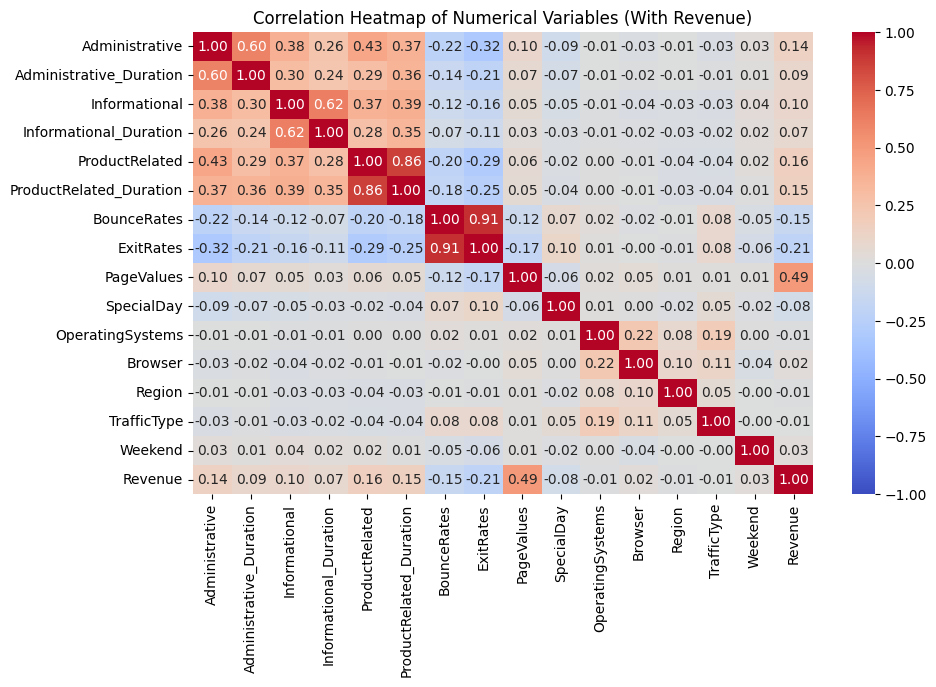

In [69]:
# Map True/False to 1/0 in the entire dataset
df = df.replace({True: 1, False: 0})

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number'])

# Compute and plot the correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables (With Revenue)')
plt.show()


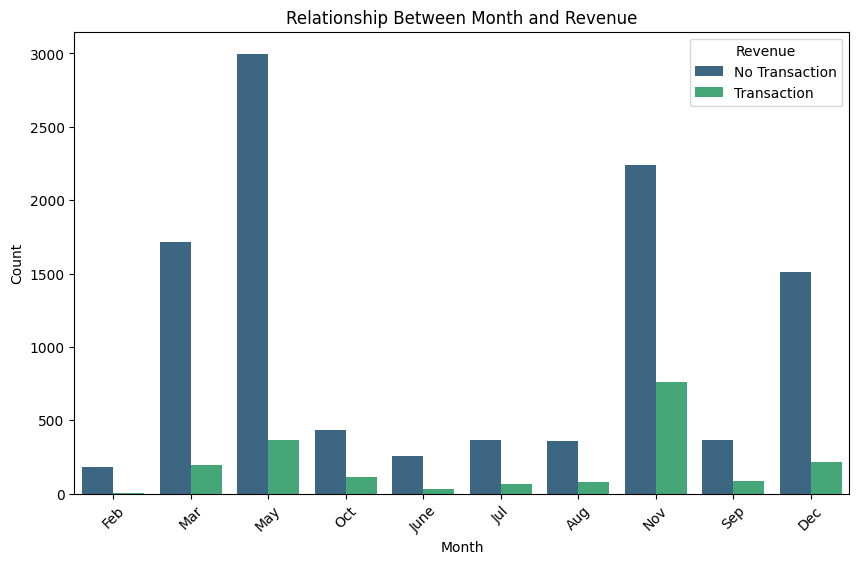

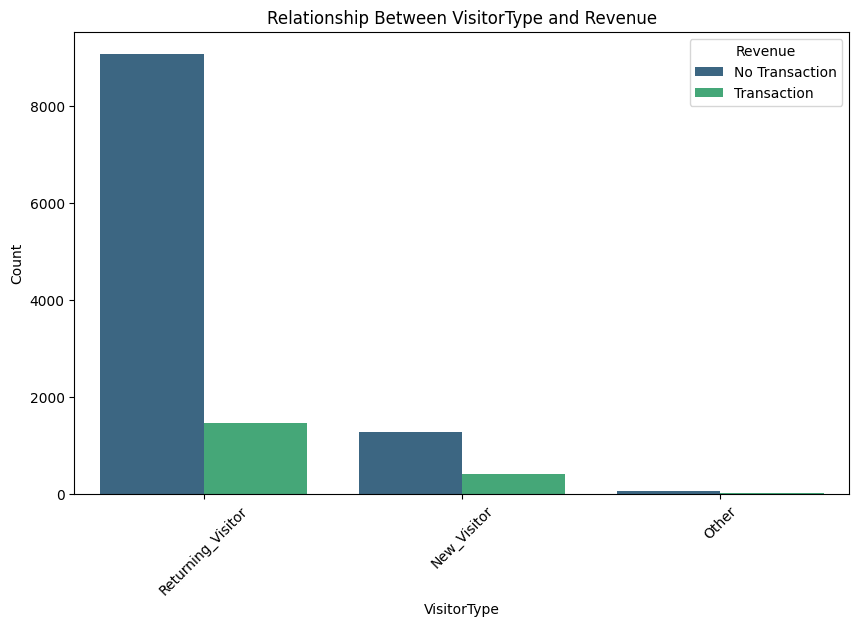

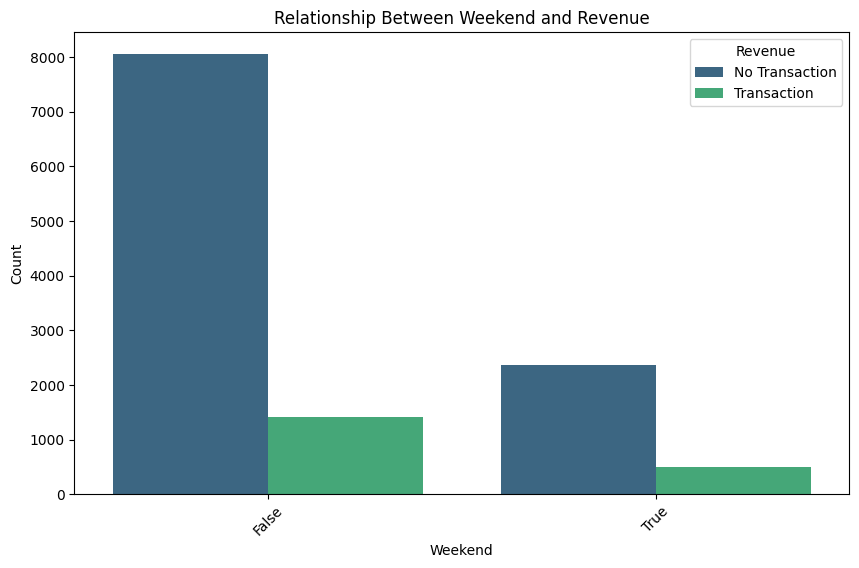

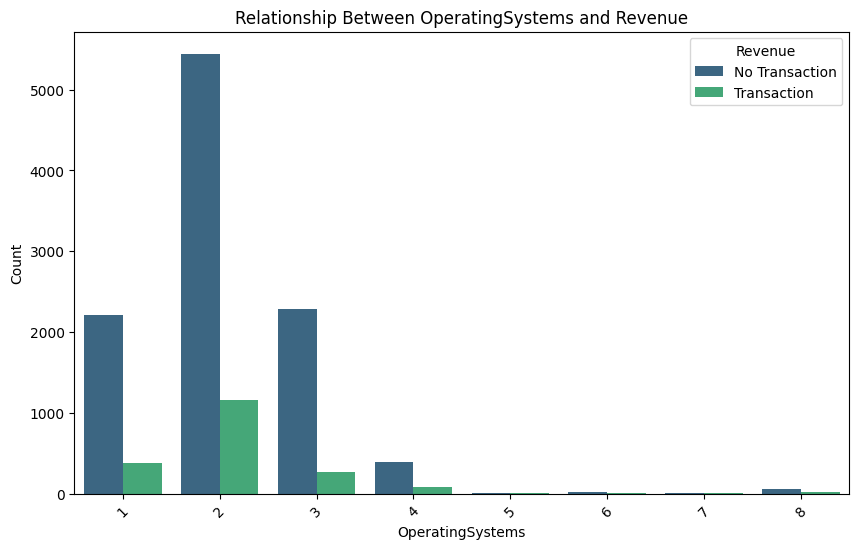

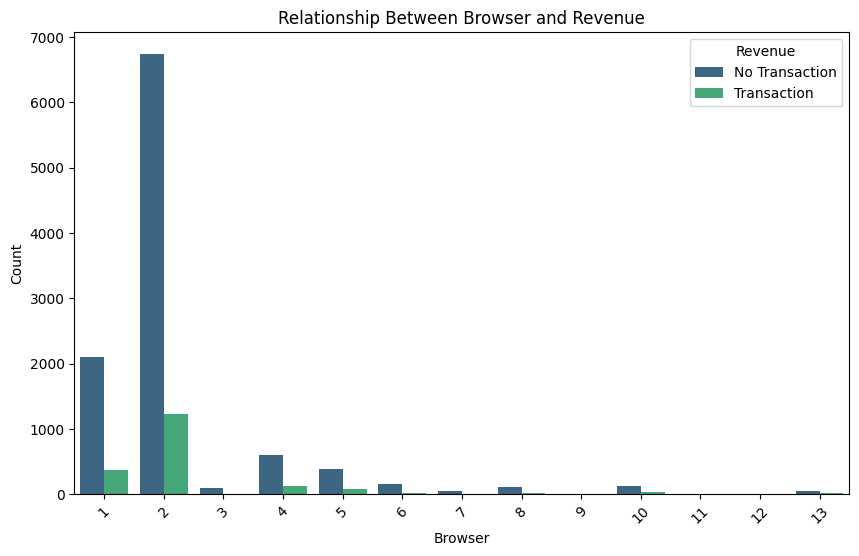

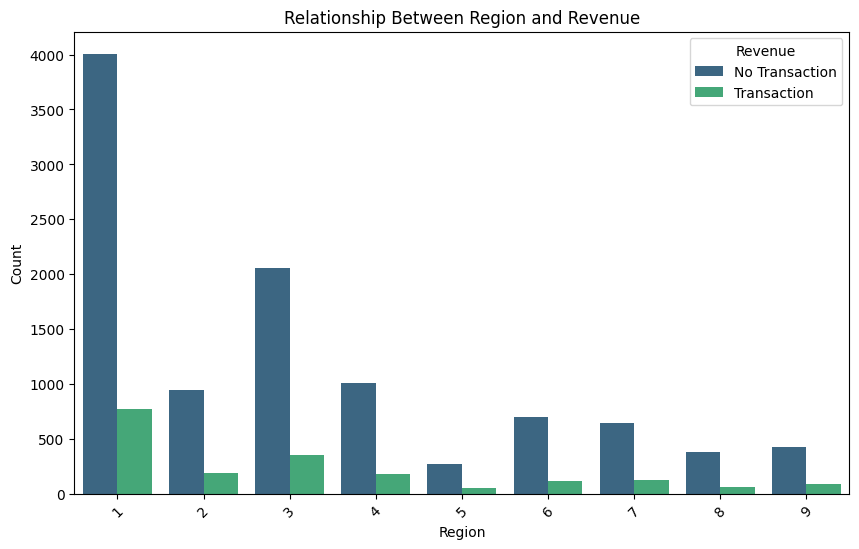

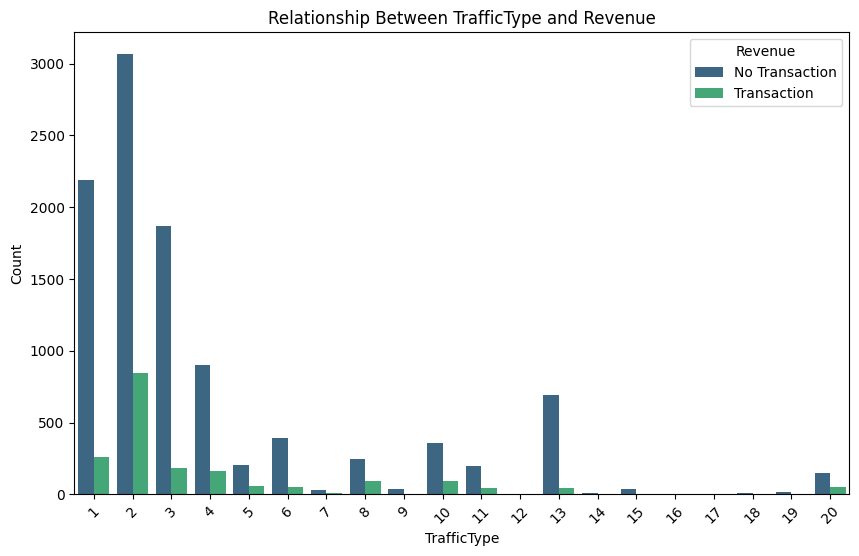

In [135]:
# List of all categorical variables to analyze
categorical_vars = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region','TrafficType']

# Generate bar plots for each categorical variable against Revenue
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var, hue='Revenue', palette='viridis')
    plt.title(f'Relationship Between {var} and Revenue')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Revenue', labels=['No Transaction', 'Transaction'])
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()


In [73]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<Axes: xlabel='Administrative', ylabel='Administrative_Duration'>

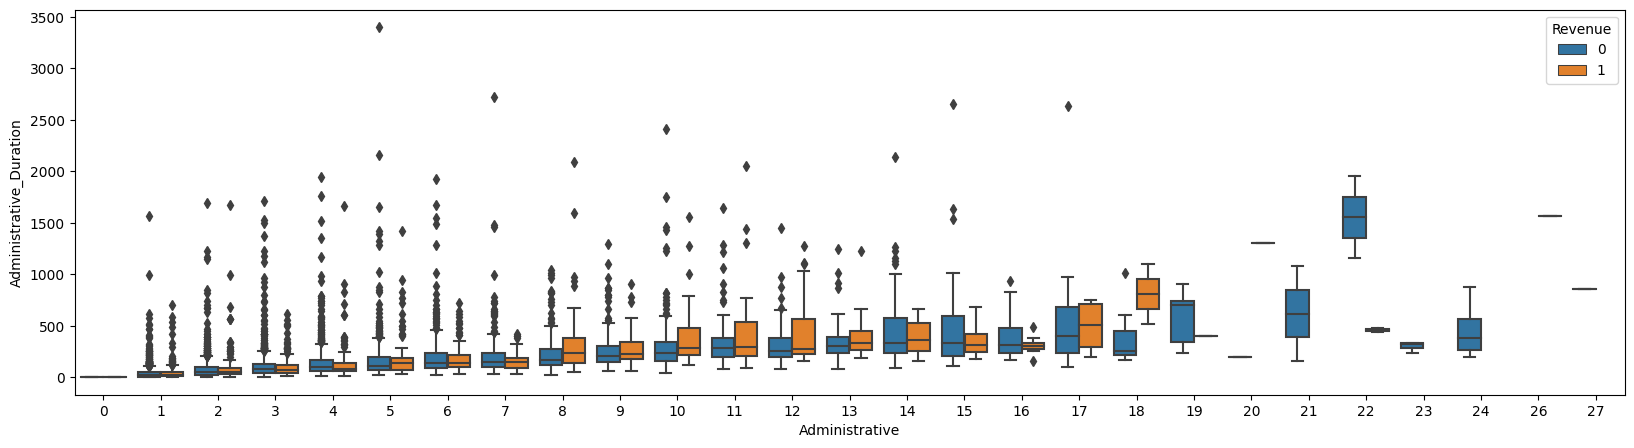

In [79]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Administrative',y='Administrative_Duration',hue='Revenue',data=df)

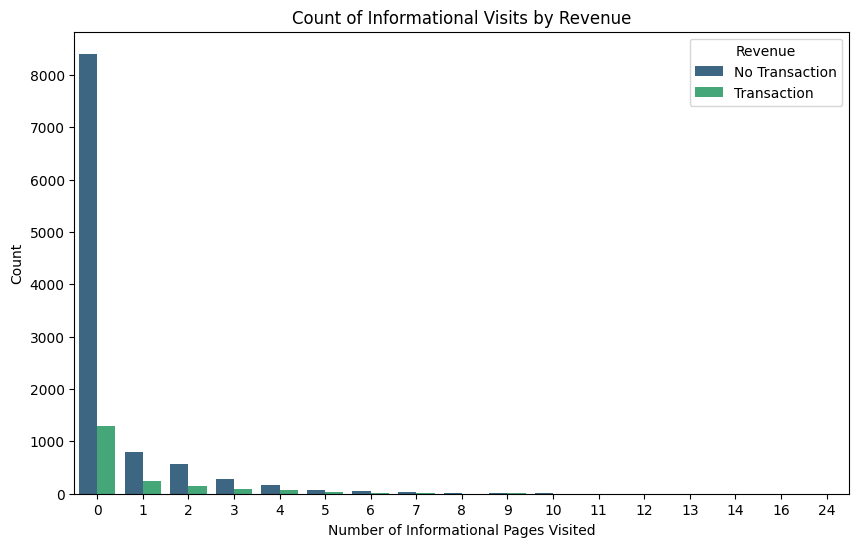

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Informational', hue='Revenue', palette='viridis')
plt.title('Count of Informational Visits by Revenue')
plt.xlabel('Number of Informational Pages Visited')
plt.ylabel('Count')
plt.legend(title='Revenue', labels=['No Transaction', 'Transaction'])
plt.show()


In [148]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [156]:
df= pd.get_dummies(df, columns = ['Month','VisitorType'])

In [157]:
scaler = StandardScaler()

In [158]:
X = df.drop(columns=['Revenue'])  
y = df['Revenue']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [163]:
#Logistic
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
print("Logistic Regression:")
print(classification_report(y_test, lr_pred))
print(f"ROC AUC Score: {lr_roc_auc:.4f}")
print(f"Confusion Matrix:\n{lr_conf_matrix}")

Logistic Regression:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3124
        True       0.77      0.36      0.49       575

    accuracy                           0.88      3699
   macro avg       0.83      0.67      0.71      3699
weighted avg       0.87      0.88      0.87      3699

ROC AUC Score: 0.8902
Confusion Matrix:
[[3061   63]
 [ 368  207]]


In [164]:
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train_scaled, y_train)
svc_pred = svc_model.predict(X_test_scaled)
svc_roc_auc = roc_auc_score(y_test, svc_model.predict_proba(X_test_scaled)[:, 1])
svc_conf_matrix = confusion_matrix(y_test, svc_pred)

print("\nSupport Vector Machine:")
print(classification_report(y_test, svc_pred))
print(f"ROC AUC Score: {svc_roc_auc:.4f}")
print(f"Confusion Matrix:\n{svc_conf_matrix}")


Support Vector Machine:
              precision    recall  f1-score   support

       False       0.90      0.97      0.94      3124
        True       0.73      0.44      0.55       575

    accuracy                           0.89      3699
   macro avg       0.82      0.70      0.74      3699
weighted avg       0.88      0.89      0.88      3699

ROC AUC Score: 0.8762
Confusion Matrix:
[[3032   92]
 [ 324  251]]


In [166]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
knn_conf_matrix = confusion_matrix(y_test, knn_pred)

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))
print(f"ROC AUC Score: {knn_roc_auc:.4f}")
print(f"Confusion Matrix:\n{knn_conf_matrix}")


K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       0.89      0.97      0.93      3124
        True       0.67      0.34      0.45       575

    accuracy                           0.87      3699
   macro avg       0.78      0.66      0.69      3699
weighted avg       0.85      0.87      0.85      3699

ROC AUC Score: 0.7860
Confusion Matrix:
[[3025   99]
 [ 377  198]]


In [167]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

print("\nRandom Forest:")
print(classification_report(y_test, rf_pred))
print(f"ROC AUC Score: {rf_roc_auc:.4f}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")


Random Forest:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.72      0.55      0.62       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699

ROC AUC Score: 0.9240
Confusion Matrix:
[[2998  126]
 [ 257  318]]


In [168]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

print("\nXGBoost:")
print(classification_report(y_test, xgb_pred))
print(f"ROC AUC Score: {xgb_roc_auc:.4f}")
print(f"Confusion Matrix:\n{xgb_conf_matrix}")


XGBoost:
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      3124
        True       0.70      0.57      0.63       575

    accuracy                           0.90      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699

ROC AUC Score: 0.9173
Confusion Matrix:
[[2982  142]
 [ 245  330]]


Tuning

In [170]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [None, 10, 20, 30],        
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],          
    'bootstrap': [True, False]              
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best ROC AUC score for Random Forest:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_
rf_pred = best_rf_model.predict(X_test_scaled)
rf_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

print("\nRandom Forest:")
print(classification_report(y_test, rf_pred))
print(f"ROC AUC Score for Random Forest on test data: {rf_roc_auc:.4f}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best ROC AUC score for Random Forest: 0.9306828117687527

Random Forest:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.74      0.54      0.62       575

    accuracy                           0.90      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699

ROC AUC Score for Random Forest on test data: 0.9293
Confusion Matrix:
[[3014  110]
 [ 264  311]]


In [171]:


param_grid_xgb = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [3, 6, 10],                
    'learning_rate': [0.01, 0.1, 0.2],     
    'subsample': [0.7, 0.8, 1.0],             
    'colsample_bytree': [0.7, 0.8, 1.0]      
}

xgb_model = xgb.XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                                scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

grid_search_xgb.fit(X_train_scaled, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best ROC AUC score for XGBoost:", grid_search_xgb.best_score_)

best_xgb_model = grid_search_xgb.best_estimator_

xgb_pred = best_xgb_model.predict(X_test_scaled)

xgb_roc_auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test_scaled)[:, 1])

print(f"ROC AUC Score for XGBoost on test data: {xgb_roc_auc:.4f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
print(f"XGBoost Confusion Matrix:\n{confusion_matrix(y_test, xgb_pred)}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.7}
Best ROC AUC score for XGBoost: 0.9351796497622177
ROC AUC Score for XGBoost on test data: 0.9300

XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      3124
        True       0.73      0.59      0.65       575

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.80      3699
weighted avg       0.90      0.90      0.90      3699

XGBoost Confusion Matrix:
[[3002  122]
 [ 237  338]]
